# Random Forest

Quick Sort

# Ensemble Learning



In [ ]:
- improve the model performance
- better predictive performance as comapared to single model 
- diversification

1000

200     200     300     300
m1       m2      m3      m4

combine them-> predict

In [ ]:
objective -> reduce -> bias and variance


bagging helps to reduce the models variance


boosting helps to reduce the models bias

![Pool of trees in Bagging and Boosting](https://quantdare.com/wp-content/uploads/2016/04/bb1-800x221.png)

# Bootstrapping

In [ ]:
random sampling with replacement

![Bootstrapping](https://miro.medium.com/max/1010/1*YYom-NKDaZ-B7RB_891DgQ.png)

 # Bagging

In [ ]:
Bootstrap Aggregation - 

- decision tree
- combining the results of multiple models



![Sample subsets in bagging](https://miro.medium.com/max/978/0*g7yNQvSRuqEgjj25.png)

In [ ]:
How it works -

1 - multiple subsets are created from the original dataset
2 - a base model is created - decision tree(in radom forest)
3 - models will run in parallel and are independent of each other
4 - final prediction is the combination of the predictions from all the models

classification -> vote and predict the majority class
regression -> mean of the predicted values

![Bagging](https://miro.medium.com/max/1012/0*mA5rdZipfga2HLjO.png)

# Boosting

In [ ]:
it is a sequential process of the attempts to correct the errors of the previous model

In [ ]:
reduce the overall error

In [ ]:
How it works

1 - A subset is created from the original dataset
2 - assign equal weights to all the data points
3 - base model is created on this subset
4 - model will make prediction on the whole dataset



![Boosting 1](https://miro.medium.com/max/171/0*u3Li30F4gRAV_3Fb.png)

In [ ]:
5 - calculate the errors (actual values and predicted values)
6 - the datapoints that are incorrectly predicted are given higher weights

In [ ]:
7 - the next model will correct the errors from the previous model

![Boosting 2](https://miro.medium.com/max/166/0*yRk4nLMrvoA4cvC6.png)

In [ ]:
8 - multiple models will be created and correct the errors of the previous model

In [ ]:
9 - the final model(strong learner) is the weighted mean of all the models(weak learners)

![Boosting 3](https://miro.medium.com/max/1202/1*k-HYpwcgzCq_Yy--05_LAw.png)

In [ ]:
- boosting is combination of a number of weak learners to form a strong learner.

![Boosting](https://miro.medium.com/max/180/0*AHlYVBCC5mpDCedP.png)

# N learners

![Getting N learners for Bagging and Boosting](https://quantdare.com/wp-content/uploads/2016/04/bb2-800x307.png)

# Weighted data elements

![Weighted data elements](https://quantdare.com/wp-content/uploads/2016/04/bb3-800x307.png)

# Classification stage

![Classification stage in action](https://quantdare.com/wp-content/uploads/2016/04/bb4-800x307.png)

![Difference in procedures](https://quantdare.com/wp-content/uploads/2016/04/bb5-800x285.png)

# Which one to select technique

In [ ]:
depends on
- data
- business problem



- they provide higher stability
- boosting could generate a combined model with lower errors
- if the single model is over-fitting -> bagging is best option



  - https://quantdare.com/what-is-the-difference-between-bagging-and-boosting/

  - https://medium.com/swlh/difference-between-bagging-and-boosting-f996253acd22

  - https://www.geeksforgeeks.org/comparison-b-w-bagging-and-boosting-data-mining/

  - https://hub.packtpub.com/ensemble-methods-optimize-machine-learning-models/

  - https://towardsdatascience.com/decision-tree-ensembles-bagging-and-boosting-266a8ba60fd9


# Assignment

https://www.kaggle.com/c/talkingdata-adtracking-fraud-detection





# Random Forest - Credit Default Prediction


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("credit-card-default.csv")

df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,defaulted
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ID         30000 non-null  int64
 1   LIMIT_BAL  30000 non-null  int64
 2   SEX        30000 non-null  int64
 3   EDUCATION  30000 non-null  int64
 4   MARRIAGE   30000 non-null  int64
 5   AGE        30000 non-null  int64
 6   PAY_0      30000 non-null  int64
 7   PAY_2      30000 non-null  int64
 8   PAY_3      30000 non-null  int64
 9   PAY_4      30000 non-null  int64
 10  PAY_5      30000 non-null  int64
 11  PAY_6      30000 non-null  int64
 12  BILL_AMT1  30000 non-null  int64
 13  BILL_AMT2  30000 non-null  int64
 14  BILL_AMT3  30000 non-null  int64
 15  BILL_AMT4  30000 non-null  int64
 16  BILL_AMT5  30000 non-null  int64
 17  BILL_AMT6  30000 non-null  int64
 18  PAY_AMT1   30000 non-null  int64
 19  PAY_AMT2   30000 non-null  int64
 20  PAY_AMT3   30000 non-null  int64
 21  PAY_AMT4   3

In [5]:
# data preperation and model building

from sklearn.model_selection import train_test_split

x = df.drop('defaulted', axis=1)

y = df['defaulted']

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state=101)

In [6]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

rfc.fit(xtrain, ytrain)

RandomForestClassifier()

In [7]:
predictions = rfc.predict(xtest)

In [8]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [9]:
print(classification_report(ytest, predictions))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      7058
           1       0.64      0.37      0.47      1942

    accuracy                           0.82      9000
   macro avg       0.74      0.66      0.68      9000
weighted avg       0.80      0.82      0.80      9000



In [10]:
print(confusion_matrix(ytest, predictions))

[[6660  398]
 [1227  715]]


In [11]:
print(accuracy_score(ytest, predictions))

0.8194444444444444


# Hyperparameter tuning

In [13]:
# help(RandomForestClassifier)

In [14]:
# tuning max_depth


from sklearn.model_selection import GridSearchCV


n_folds = 5


parameters = { 'max_depth': range(2,20,5) }


rf = RandomForestClassifier()

rf = GridSearchCV(rf, parameters, cv=n_folds, scoring='accuracy')

rf.fit(xtrain, ytrain)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': range(2, 20, 5)}, scoring='accuracy')

In [15]:
scores = rf.cv_results_

pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.893414,0.070453,0.030026,0.001570,2,{'max_depth': 2},0.800952,0.799524,0.798333,0.796905,0.797619,0.798667,0.001433,4
1,2.295571,0.218340,0.048557,0.005844,7,{'max_depth': 7},0.816429,0.817381,0.818810,0.816190,0.814762,0.816714,0.001342,1
2,3.323206,0.090330,0.071992,0.001929,12,{'max_depth': 12},0.815714,0.816905,0.818571,0.812381,0.818333,0.816381,0.002251,2
3,4.428822,0.154107,0.099140,0.007495,17,{'max_depth': 17},0.816667,0.815000,0.819286,0.809762,0.815714,0.815286,0.003120,3


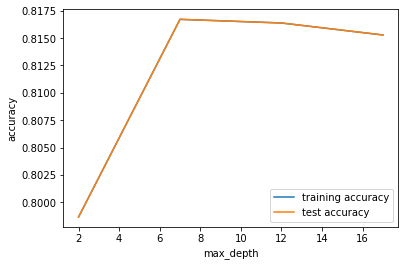

In [17]:
plt.figure()

plt.plot(scores['param_max_depth'], scores['mean_test_score'], label='training accuracy')

plt.plot(scores['param_max_depth'], scores['mean_test_score'], label='test accuracy')
plt.xlabel('max_depth')
plt.ylabel('accuracy')

plt.legend()
plt.show()

In [18]:
# tuning n_estimators

# tuning max_depth


from sklearn.model_selection import GridSearchCV


n_folds = 5


parameters = { 'n_estimators': range(100,1500,400) }


rf = RandomForestClassifier(max_depth=7)

rf = GridSearchCV(rf, parameters, cv=n_folds, scoring='accuracy')

rf.fit(xtrain, ytrain)

GridSearchCV(cv=5, estimator=RandomForestClassifier(max_depth=7),
             param_grid={'n_estimators': range(100, 1500, 400)},
             scoring='accuracy')

In [19]:
scores = rf.cv_results_

pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,2.542514,0.106406,0.057991,0.005185,100,{'n_estimators': 100},0.815476,0.820476,0.816429,0.815000,0.815000,0.816476,0.002067,4
1,12.176040,0.841218,0.268887,0.045651,500,{'n_estimators': 500},0.815000,0.820476,0.818810,0.814762,0.817619,0.817333,0.002200,3
2,20.084021,1.172875,0.438831,0.042823,900,{'n_estimators': 900},0.817143,0.822143,0.817381,0.817143,0.815952,0.817952,0.002154,1
3,28.438308,0.420912,0.599832,0.020184,1300,{'n_estimators': 1300},0.815476,0.822857,0.818333,0.815000,0.817619,0.817857,0.002797,2


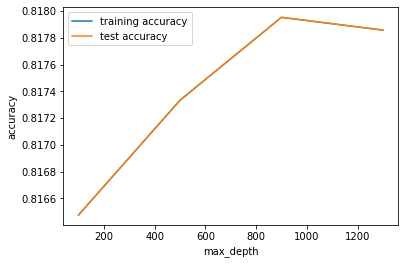

In [22]:
plt.figure()

plt.plot(scores['param_n_estimators'], scores['mean_test_score'], label='training accuracy')

plt.plot(scores['param_n_estimators'], scores['mean_test_score'], label='test accuracy')
plt.xlabel('max_depth')
plt.ylabel('accuracy')

plt.legend()
plt.show()

# create your own hyperparameters

# Optimal Values

In [24]:
param_grid = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200,500,200),
    'n_estimators': [100,200,300],
    'max_features': [5,10]
}

rf = RandomForestClassifier()

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1)

In [25]:
grid_search.fit(xtrain, ytrain)

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [4, 8, 10], 'max_features': [5, 10],
                         'min_samples_leaf': range(100, 400, 200),
                         'min_samples_split': range(200, 500, 200),
                         'n_estimators': [100, 200, 300]})

In [26]:
grid_search.best_score_

0.8185238095238095

In [27]:
grid_search.best_params_

{'max_depth': 4,
 'max_features': 10,
 'min_samples_leaf': 100,
 'min_samples_split': 200,
 'n_estimators': 300}

## Fitting the model using previous parameters as the optimum values


# Assignment

https://www.kaggle.com/c/talkingdata-adtracking-fraud-detection